# Building a perceptron

--------------------------------------prerequisite(begin)-------------------------------------------

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 
%pylab inline
import matplotlib.image as mpimg

Populating the interactive namespace from numpy and matplotlib


--------------------------------------prerequisite(end)---------------------------------------------

in last topic , we saw a use of perceptron. that was a fairly simple use case, since we were able to create a model which would predict correct output for upto 2 1-bit inputs by changing just a few values in an equation.  
However , the real life situation is much different than this, the data is rather a large set of multiple bit values.  
So if we have a sample points using which we have to make a points classifier :  
1.  We would plot the points on a 2d plan as it is. they will be color coded, based on their actual values, like red and blue
2. Since the Algorithm doesn't have a model yet, it starts from a random side and draws a line dividing the plain into2 halves, one expected to have all the red points , and other expected to have all the blue points.
3. But since this line is being randomly drawn, it is a fair chance, that it  does not do what is expected, i.e it has  some blue points in the red half or vice vera

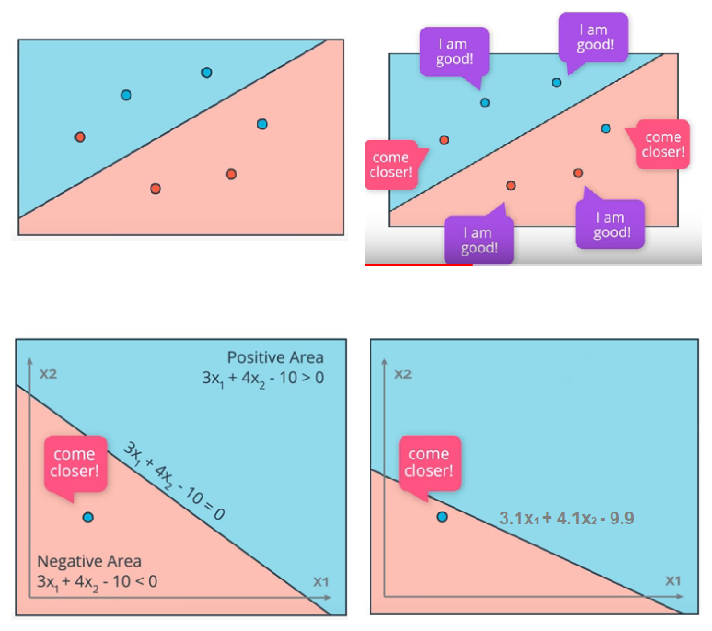

In [67]:
filename1 = r'P:\PYTHON\PYTORCH_SCHOLARSHIP\notebooks\ab_perceptrons\points classifier_inaccurate.png'
filename2 = r"P:\PYTHON\PYTORCH_SCHOLARSHIP\notebooks\ab_perceptrons\points classifier_inaccurate_2.png"
filename3 = r'P:\PYTHON\PYTORCH_SCHOLARSHIP\notebooks\ab_perceptrons\points classifier_inaccurate_3.png'
filename4 = r"P:\PYTHON\PYTORCH_SCHOLARSHIP\notebooks\ab_perceptrons\points classifier_accurate_4.png"

fig = plt.figure(figsize=[10, 10])

sub1 = fig.add_subplot(2, 2, 1, frameon=False)
img = mpimg.imread(filename1)

sub2 = fig.add_subplot(2, 2, 2, frameon=False)
img2 = mpimg.imread(filename2)

sub3 = fig.add_subplot(2, 2, 3, frameon=False)
img3 = mpimg.imread(filename3)

sub4 = fig.add_subplot(2, 2, 4, frameon=False)
img4 = mpimg.imread(filename4)

sub1.imshow(img)
sub2.imshow(img2)
sub3.imshow(img3)
sub4.imshow(img4)


plt.setp(sub1, xticks=[], yticks=[])
plt.setp(sub2, xticks=[], yticks=[])
plt.setp(sub3, xticks=[], yticks=[])
plt.setp(sub4, xticks=[], yticks=[])

plt.tight_layout()
plt.show()

So how do we solve it?
4. Suppose the randomly drawn line is 3x1 +4x2-10. and the wrong point is 1,1.  
5. we subtract the point from the coefficients of this line, i.e the weights . but doing such a large subtraction might disrupt the configaration of othr points, since they are sitting in the right zone.
6. so we subtract a fraction of this point's value, like 10% or 20%  . this fractional multiplier is called **LEARNING RATE**.

```
Line eqn	 	:   3X1  +  4X2  -10
point	    	:   1       1     1
point10%	         :   0.1     0.1   0.1
-----------------------------------------------
(lineqn+point)10%	: 3.1X1  +  4.1X2 -9.9
```
and this equation is actually nearer to wrong point, thus making it right, as shown it in the picture above.   
we keep on subtracting the learning rate until all the wrong points come in the correct area.

## Excersize ===============================================================  
following(data_zzb_points.csv) is the data for different points plotted on the the graph. the orange colored points belong to zone 1 and the blue colored points belong to zone 0. you have to draw a line and therefore divide the plane into two zones zone0 and zone1 such that all the points belonging to zone 1 lie in zone 1 and likewise.


### Solution

In [68]:
#pre requisite
dframe = pd.read_csv(r'P:\PYTHON\PYTORCH_SCHOLARSHIP\notebooks\ab_perceptrons\data_zzb_points.csv')
dframe.head()

,x,y,zone
0,0.78051,-0.063669,1
1,0.28774,0.291390,1
2,0.40714,0.178780,1
3,0.29230,0.421700,1
4,0.50922,0.352560,1


#### Step 1. plotting the points
- points ar plotted directly, just for a reference. they get color based on their zone 

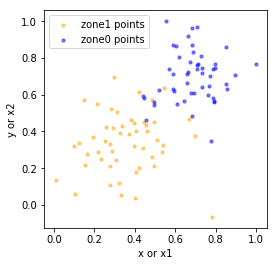

In [69]:
def plot_points(ax):
    df_zone1 = dframe[dframe.zone == 1]
    df_zone0 = dframe[dframe.zone == 0]
    ax.scatter(df_zone1.x, df_zone1.y, s=10, label='zone1 points', color='orange', alpha=0.5)
    ax.scatter(df_zone0.x, df_zone0.y, s=10, label='zone0 points', color='blue', alpha=0.5)
    ax.set(xlabel="x or x1",ylabel='y or x2')
    ax.legend()

fig, ax =plt.subplots(figsize=[4,4])    
plot_points(ax)

#### Step 2 Drawing a random line
- equation of a line we want to draw = w1x + w2y + b = 0(in mathemetical terms)  or  w1x1 + w2x2 + b = 0(in DL terms)
- since a line can be drawn using a minimum of 2 points and x's value only determines the length of the line, so we generate 2 points as :  
**w1x + w2y + b = 0**  
=> y = -(b + w1x)/w2  
- passing x values as -0.3 and 1.3  and taking w1,w2,b as 1,1,1*(IMP , this will be important in later part), we get equation as as:  
=> y = -(1+x)  
- therefore if:
```
{  
	x= -0.3 , y= -0.7  , point=(-0.3,-0.7) ;
	x=  1.3 , y= -2.3  , point=(-0.3,-0.7)
}
```  
- Here is the function to draw a line:  

In [70]:
def line_generator(w1, w2, b ,ax):
    # w1x + w2y +b =0 , therefore plotting this line using 2 points : x1,y1 and x2,y2 
    # warning : DO NOT PASS W2==0
    x1, x2 = (dframe.x.min()-0.1), (dframe.x.max()+0.1) #just 2 random values , we cantake -1 to 1 also
    y1, y2 = [
        -(b + w1 * x1) / w2,
        -(b + w1 * x2) / w2
    ]
    ax.plot((x1,x2),(y1,y2),color='green',linestyle=':')


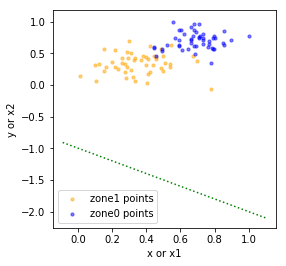

In [71]:
# thus drawing a line over the current plot using biases as    
w1=1
w2=1
b= 1

fig, ax =plt.subplots(figsize=[4,4])
line_generator(w1,w2,b,ax)
plot_points(ax)



As we can see. the line is way too much far from  dividing correctly . but try  changing the biases and the weights a little bit, and you will find that it has almost correctly:

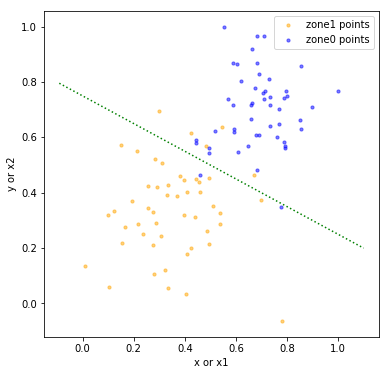

In [72]:
w1=1
w2=2
b= -1.5

fig, ax =plt.subplots(figsize=[6,6])
line_generator(w1,w2,b,ax)
plot_points(ax)


#### step 3 drawing the correct path based on perceptron model.

Thus , as we remember from the theoritical part, we will be reading each point, asking weather it is in the correct zone or not , and then based o that, we will change the values for w1,w2,b such that the model achieves maximum accuracy. we will be using the concept of ***learning rate***.  

We remember from the video on perceptrons , that if  a point is on the wrong side of the line, we subtract  a small fraction of this point's indices from the weights and biases , so as to make the line come closer to it.  

For each point on thr plane, we will ask them weather they are in the correct zone or not. for this we will use the points's `zone` value.  
  
1. As we can see, if a point is blue(**i.e its zone is 0**) , it **should lie `above` the line**. i.e if this point `(x1,y1)` is inserted in the line equation's function  `L(x,y)= w1x+w2y+b for constants w1,w2,b`, it should give the output as a **greater than or equal to 0** or +ve value . same goes for the `zone 1` points.
	- For points giving this result, we won't change any thing , and let the value for w1,w2,b  to remain **as it is**.  
2. For the points that does not give expected results, we go on checking their results. a zone0 or blue point giving a -ve result means it is below the line, so the line needs to come closer to it.This is achievable by making a small increase in w1,w2,b ;as described in the same video.There fore we do:  
>> w1= w1 + (w1-x1)/10  
>> w2= w2 + (w2-y1)/10  
>> b = b  +   (b-1)/10  
3. Similarly if a zone1 or orange point is above the line, it will give a +ve result, therfore we have to move our line up to the top such that the point comes again below the line. there fore, we simply reduce a small fraction of the difference from w1,w2,b:  
>> w1= w1 - (w1-x1)/10  
>> w2= w2 - (w2-y1)/10  
>> b = b  -   (b-1)/10 

 

In [73]:
# some container classes for easy transfer of data and results
class Prediction_results:
    ispoint_in_correctzone = True
    differences = 0, 0, 0
    inc_or_decrease = 0
    
    def __init__(self, ispoint_in_correctzone=True, differences=(0,0,0), inc_or_decrease=0):
        self.ispoint_in_correctzone = ispoint_in_correctzone
        self.differences = differences
        self.inc_or_decrease = inc_or_decrease
    
    def __str__(self):
        return "[  ispoint_in_correctzone{%s}, diffrenences{%s}, inc_or_decrease{%s}  ]"\
               %(self.ispoint_in_correctzone,self.differences,self.inc_or_decrease)
        
class Point:
    x = 0
    y = 0
    zone = 0
    
    def __init__(self, x, y, zone):
        self.x = x
        self.y = y
        self.zone = zone
    def __str__(self):
        return "[  x{%s}, y{%s}, zone{%s}  ]"\
               %(self.x,self.y,self.zone)


w1,w2,b= 0.39144038759999805 0.4839095890000065 -0.45800000000000124


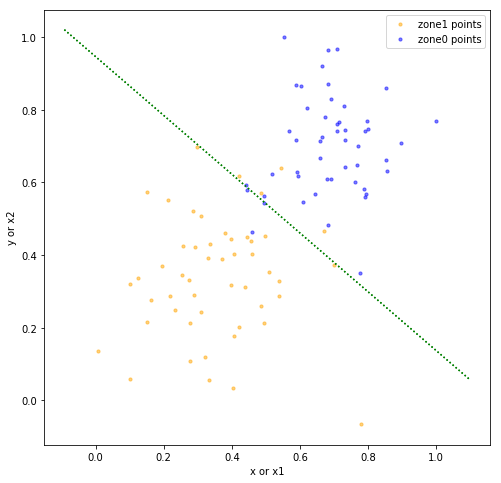

In [78]:
def helper_ispoint_in_correctzone(w1, w2, b, point, l_rate=0.1):
    equation_sum = w1 * point.x + w2 * point.y + b
    results = Prediction_results()
    # print("---> equation sum=",equation_sum)
    if point.zone == 0:
        if equation_sum >= 0:
            pass  # correct statement , do nothing
        else:
            results.ispoint_in_correctzone = False
            results.differences = (point.x * l_rate), \
                                  (point.y * l_rate), \
                                  l_rate
            results.inc_or_decrease = 0
    if point.zone == 1:
        if equation_sum < 0:
            pass  # correct statement , do nothing
        else:
            results.ispoint_in_correctzone = False
            results.differences = (point.x * l_rate), \
                                  (point.y * l_rate), \
                                  l_rate
            results.inc_or_decrease = 0
            results.inc_or_decrease = -1

    return results

def weight_bias_modifier(w1, w2, b, dframe):
    epoch = 200
    w1_new, w2_new, b_new = w1, w2, b
    learning_rate = 0.001
    for i in range(epoch):
        for i in dframe.itertuples():
            point = Point(i[1], i[2], i[3])
            # print("point=", point)
            pwmr = helper_ispoint_in_correctzone(w1_new, w2_new, b_new, point,
                                                 learning_rate)  #pwmr = pointwise_weight_modification_results
            # print("pwmr=", pwmr)
            if not pwmr.ispoint_in_correctzone:
                if pwmr.inc_or_decrease >= 0:
                    w1_new += pwmr.differences[0]
                    w2_new += pwmr.differences[1]
                    b_new  += pwmr.differences[2]
                else:
                    w1_new -= pwmr.differences[0]
                    w2_new -= pwmr.differences[1]
                    b_new  -= pwmr.differences[2]
            # print("weights now: w1,w2,b=", w1_new, w2_new, b_new)
            # print("=" * 60)
    return w1_new, w2_new, b_new


w1 , w2, b = weight_bias_modifier(1,1,1, dframe)
print('w1,w2,b=',w1,w2,b)
fig, ax = plt.subplots(figsize=[8, 8])
line_generator(w1, w2, b, ax)

line_generator(w1, w2, b, ax)
plot_points(ax)


In [123]:
for i in dframe.head().itertuples():
    print(i[0],i[1],i[2],i[3])

0 0.78051 -0.063669 1
1 0.28774 0.29139 1
2 0.40714 0.17878 1
3 0.2923 0.4217 1
4 0.50922 0.35256 1


In [135]:
(dframe[dframe.x>=0.5])# 0.54527  0.639110     1

,x,y,zone
0,0.78051,-0.063669,1
4,0.50922,0.352560,1
24,0.69907,0.373070,1
29,0.53741,0.286370,1
36,0.67078,0.465380,1
38,0.53838,0.327740,1
41,0.54527,0.639110,1
50,0.55330,1.000000,0
52,0.85176,0.661200,0
53,0.60436,0.866050,0
